# Data Preparation and Preprocessing
Learning outcomes:


*   Relational data storage with Pandas
*   Different storage models
*   Data Transformation
*   Data cleansing



# 1. Data storage: Pandas library
Pandas:
* Open source library
* Process **relational data** in memory
* Support SQL-like query

Rich relation data tool built on top of **NumPy**
* Excellent performance
* Easy to use, highly consisten API

A foundation for data analysis in Python
* It also has built-in visualization features
* It can work with data from a wide variety of source
s
* Takes data preparation and preprocessing to the next level


# Pandas vs. SQL implementations

| Advantage                                                                                                            | Disadvantage                                                                   |
|----------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| Pandas is lightweight and fast.                                                                                      | Tables must fit into memory                                                    |
| Natively Python, i.e., full SQL expressiveness plus the expressiveness of Python, especially for function evaluation | No post-load indexing functionality: indices are built when a table is created |
| Integration with plotting functions like Matplotlib                                                                  | No transactions, journaling, etc                                               |
|                                                                                                                      | Large, complex joins are slower                                                |

# Pandas features
* Series
* DataFrames → Tables
* Operations
  * Group by
  * Merging, Joining and Concatening
* Data Input and Output


# Pandas Series
* Series: a named, ordered dictionary
  * Easy data search and retrieval.
* One-dimensional labeled array capable of holding data of any
type (integer, string, float, python objects, etc.).
  * The keys of the dictionary are the indexes
  * Built on NumPy’s ndarray
  * Values can be any NumPy data type object
* Why use Series?
  * Better for single-valued entries of the same type (Integer, String, etc.).
  * Easy and efficient search using index.

In [86]:
!pip install pandas
!pip install numpy

In [87]:
import pandas as pd
import numpy as np


* Create a series:

In [88]:
ser1 = pd.Series(data=[1, 2, 3, 4], index=['USA', 'Germany', 'USSR', 'Japan'])
ser1 

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

* Access an element → Search by **element's index**.
* Easy to search for elements in big series.

In [89]:
ser1['USA']

1

* Operations are then done based on the **index**.

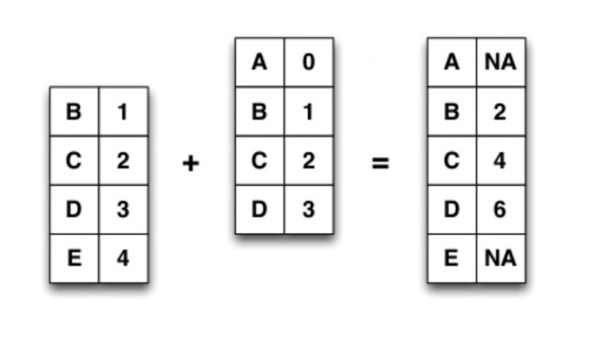

# Pandas DataFrame
* ***DataFrame***: a table with named columns (like in the relational model)
  * Represented as a dictionary
    * columnName -> series
* Each Series object represents a column
* Each column can have a different type
* Row and column indices
* Size mutable: insert and delete columns

* Why Use DataFrames?
  * Better for series with multiples attributes of different types.
  * Easy and efficient search elements by index.

  
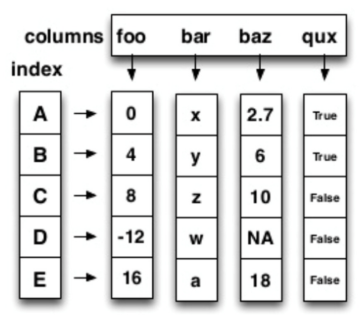

* Create a data frame

In [90]:
df = pd.DataFrame(np.random.randn(5, 4), index='A B C D E'.split(' '), columns='W X Y Z'.split(' '))

numpy.random.randn(d0, d1, …, dn) : creates an array of specified shape and fills it with random values as per standard normal distribution.

In [91]:
df

,W,X,Y,Z
A,-0.490199,0.002951,1.228687,-1.057329
B,1.124307,-0.237261,2.344359,-0.578958
C,0.771642,-1.425734,-0.078231,0.856271
D,0.446048,0.244220,-0.103692,-0.325805
E,-1.413571,-0.991511,-1.472565,0.947416


* Selection and Indexing: you can select columns by their
names.
* Columns of DataFrame are just Series.

In [92]:
df['W']

A   -0.490199
B    1.124307
C    0.771642
D    0.446048
E   -1.413571
Name: W, dtype: float64

In [93]:
df[['W', 'Z']]

,W,Z
A,-0.490199,-1.057329
B,1.124307,-0.578958
C,0.771642,0.856271
D,0.446048,-0.325805
E,-1.413571,0.947416


In [94]:
type(df['W'])

pandas.core.series.Series

* Conditional Selection: An important feature of pandas is conditional selection → The result is also a DataFrame.
  * Filter rows based on a given condition.
  * Useful if you want to do analytics on a specific set of entries.

In [95]:
df > 0

,W,X,Y,Z
A,False,True,True,False
B,True,False,True,False
C,True,False,False,True
D,True,True,False,False
E,False,False,False,True


In [96]:
df[df > 0]

,W,X,Y,Z
A,NaN,0.002951,1.228687,NaN
B,1.124307,NaN,2.344359,NaN
C,0.771642,NaN,NaN,0.856271
D,0.446048,0.244220,NaN,NaN
E,NaN,NaN,NaN,0.947416


In [97]:
df[df['W'] > 0]

,W,X,Y,Z
B,1.124307,-0.237261,2.344359,-0.578958
C,0.771642,-1.425734,-0.078231,0.856271
D,0.446048,0.244220,-0.103692,-0.325805


* Conditional Selection: for two conditions you can use | and & ( cannot user **and** and **or**
with parenthesis.
  * Filtering rows based on multiple conditions.

In [98]:
df[(df['W'] > 0) & (df['Y'] > 1)]

,W,X,Y,Z
B,1.124307,-0.237261,2.344359,-0.578958


# DataFrame Multi-index
* Multi-index and index hierarchy: create a multi-index DataFrame.
  * Data can be organized and searched using any of the index levels.

In [99]:
# Index Levels
outside = 'G1 G1 G1 G2 G2 G2'.split(' ')
outside

['G1', 'G1', 'G1', 'G2', 'G2', 'G2']

In [100]:
inside = [1, 2, 3, 1, 2, 3]
hier_index  = list(zip(outside, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [101]:
hier_index

MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

In [102]:
df = pd.DataFrame(np.random.randn(6, 2), index=hier_index, columns=['A', 'B'])
df

A         B
G1 1  0.209907  1.499996
   2  0.484440  0.486959
   3 -0.090781  1.042062
G2 1 -0.879545 -0.694455
   2  1.372550 -1.769279
   3  1.189599 -2.338916

# Missing Data
* Data is not perfect → There maybe **missing values**
* E.g. :


In [103]:
df = pd.DataFrame({'A': [1, 2, np.nan],
                   'B':[5, np.nan, np.nan],
                   'C':[1, 2, 3]})

In [104]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


# Pandas: Removing missing data
* **Drop all rows** with missing values:

In [105]:
df.dropna()

,A,B,C
0,1.0,5.0,1


* **Drop all columns** with missing values:

In [106]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


* **Drop rows** with 2 or more missing values

In [107]:
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


* Fill in the  missing values
  * Basic step of **data completion**

In [108]:
# With arbitrary value
df.fillna(value='FILL VALUE')

,A,B,C
0,1,5,1
1,2,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [109]:
# With calculated value
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

# Find Null Values
* E.g.:

In [110]:
df = pd.DataFrame({'col1':[1, 2, 3, np.nan],
                   'col2':[np.nan, 555, 666, 444],
                   'col3':['abc', 'def', 'ghi', 'xyz']})
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [111]:
df.isnull()

,col1,col2,col3
0,False,True,False
1,False,False,False
2,False,False,False
3,True,False,False


# Pandas Groupby
* **GroupBy** allows you to **group together rows** based on a
column and perform an aggregate function on them.
  * E.g: sum students by grading
  * 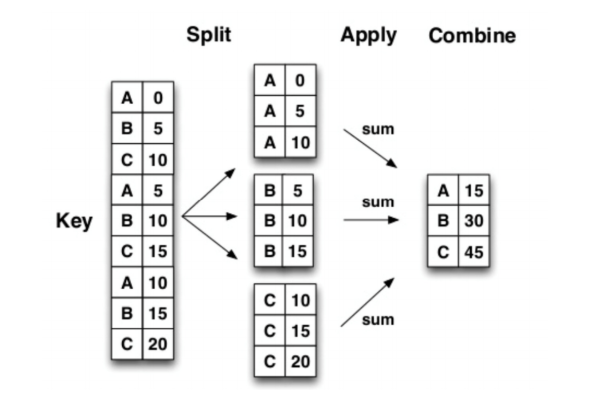
* Create a DataFrameGroupBy object and apply call aggregate
methods.


In [112]:
# Create dataFrame with dict
data = {
    'Company':['GOOG', 'GOOG', 'MSFT', 'MSFT', 'FB', 'FB'],
    'Person':['Sam', 'Charlie', 'Amy', 'Vanessa', 'Carl', 'Sarah'],
    'Sales':[200, 120, 340, 124, 243, 350]
}

In [113]:
df = pd.DataFrame(data)

In [114]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [115]:
df.groupby('Company').mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


* More aggregate methods:
  * Standard deviation
  * Minimun
  * Maximum
  * Count

In [116]:
df.groupby('Company').std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [117]:
df.groupby('Company').max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [118]:
df.groupby('Company').count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


# Pandas Combining DataFrame
* There are 3 main ways of **combining DataFrame**:
  * Concatenation
  * Merging
  * Joining
* Example: Suppose you have 3 DataFrames and you want to combine them:

In [119]:
df1 = pd.DataFrame(data=['A0 B0 C0 D0'.split(), 
                         'A1 B1 C1 D1'.split(), 
                         'A2 B2 C2 D2'.split(), 
                         'A3 B3 C3 D3'.split()],
                   columns='A B C D'.split())
df1


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [120]:
df2 = pd.DataFrame(data=['A4 B4 C4 D4'.split(), 
                         'A5 B5 C5 D5'.split(), 
                         'A6 B6 C6 D6'.split(), 
                         'A7 B7 C7 D7'.split()],
                   columns='A B C D'.split(),
                   index=range(4,8))
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [121]:
df3 = pd.DataFrame(data=['A8 B8 C8 D8'.split(), 
                         'A9 B9 C9 D9'.split(), 
                         'A10 B10 C10 D10'.split(), 
                         'A11 B11 C11 D11'.split()],
                   columns='A B C D'.split(),
                   index=range(8,12))
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


# Pandas: Concatenation
* **Concatenation**: basically glues together DataFrames rows.
  * Keep in mind that dimensions should match along the axis (column) you are concatenating on.
* You can use **pd.concat** and pass in a list of DataFrames to concatenate together:

In [122]:
pd.concat([df1, df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


# Pandas: Merging
* **Merge**: allows you to merge DataFrames together using a similar logic as merging SQL Tables → **Merge columns**.
* Example:

In [123]:
left = pd.DataFrame(['A0 B0 K0'.split(),
                     'A1 B1 K1'.split(),
                     'A2 B2 K2'.split(),
                     'A3 B3 K3'.split()],
                    columns='A B key'.split())
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K2
3,A3,B3,K3


In [124]:
right = pd.DataFrame(['C0 D0 K0'.split(),
                     'C1 D1 K1'.split(),
                     'C2 D2 K2'.split(),
                     'C3 D3 K3'.split()],
                    columns='C D key'.split())
right

,C,D,key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K3


In [125]:
pd.merge(left, right, how='inner', on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


# Pandas: Joining
* **Join**:  Joining is a convenient method for **combining the 
columns** of two potentially differently-indexed DataFrames
into a single result DataFrame.
* E.g.:


In [126]:
left = pd.DataFrame({
    'A':'A0 A1 A2'.split(),
    'B':'B0 B1 B2'.split(),  
    },
    index='K0 K1 K2'.split(),)
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [127]:
right = pd.DataFrame({
    'C':'C0 C1 C2'.split(),
    'D':'D0 D1 D2'.split(),  
    },
    index='K0 K2 K3'.split(),)
right

,C,D
K0,C0,D0
K2,C1,D1
K3,C2,D2


In [128]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C1,D1


In [129]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C1,D1
K3,NaN,NaN,C2,D2


![](https://i.redd.it/dyqnzpuddxk21.png)

# Pandas: UNIQUE and NUNIQUE
* E.g:


In [130]:
df = pd.DataFrame({
          'col1':[1, 2, 3, 4],
          'col2':[444, 555, 666, 444],
          'col3':['abc', 'def', 'ghi', 'xyz'],
    })
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [131]:
df['col2'].unique()

array([444, 555, 666])

In [132]:
df['col2'].nunique()

3

In [133]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

# Pandas: Sorting a DataFrame
* Example:
  * Sort the entire rows by a given column.

In [134]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [135]:
df.sort_values(by='col2') # inplace = False by default

,col1,col2,col3
0,1,444,abc
3,4,444,xyz
1,2,555,def
2,3,666,ghi


# Pandas: Pivot Table - Reshape
* E.g:

In [136]:
data = {
      'A':'foo foo foo bar bar bar'.split(),
      'B':'one one two two one one'.split(),
      'C':'x y x y x y'.split(),
      'D':[1, 3, 2, 5, 4, 1]
}
df = pd.DataFrame(data)
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [137]:
df.pivot_table(values='D', index=['A', 'B'], columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

# Data Normalization
* Why:
  * Non-normalized data might affect analysis results.
  * Data from different sources may be in different scales, ranges, and units → Meters and Feet.
  * Data may be biased/skewed.
* When:
  * Data should be in the same scale
  * Bias data into a specific range/size for specific purposes

# How to normalize
* **Read documentation** of tools:
  * Scikit-learn’s PCA implementation has a “whiten” option
  * Sciki-learn has a preprocessing module with handy normalize and 
scale functions
  * Convert textual data to numerical/ordinal data might be convenient 
for classification:
    * E.g. Your data may have “yes” and “no” that needs to be converted  to “1” and “0”.
* Don’t forget to **rescale/unbiased the results** → correct interpretation

# Data cleaning
* Data cleaning: very time-consuming step in data analytics
* Why data cleaning?
  * Make analytical result reliable
    * Result could be skewed/bias → mistakes, wrong business decisions (e.g. 
fake reviews lead to wrong conclusion of customer opinion)
  * Reduce the effort of data analytics:
    * Simple models on clean data can outperform complex models on dirty data
* Challenges:
  * Too many sources produce dirty data
  * No generic framework for data cleaning → handle case by case
  * Need background knowledge → human involvement → costly, time consuming, not scalable

# Types of “dirty” data
* Formatting
* Missing data
* Erroneous data
* Irrelevant data
* Inconsistent data
* Malicious data
* Outliers

# Formatting
* What: the same entity can be inconsistently formatted
* Why: different standards, different platforms
* Examples:
  * Dates (US format …)
  * Phone numbers (parentheses, dashes)
* How to handle:
  * Identify all standard formats
  * Convert to the same format
  *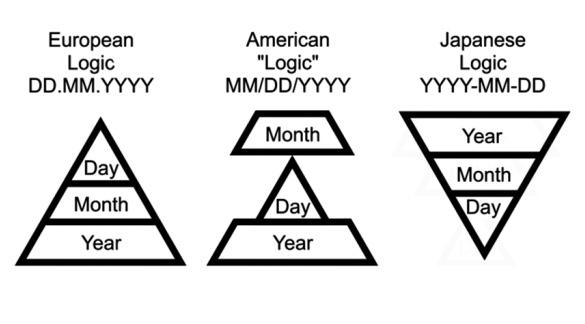

# Missing data
* What: Some of the data are not there
* Why:
  * Invalid data and ingestion
    * Invalid city
    * Missing state
    * Missing zipcode
  * Unexpected incident
    * Server crash

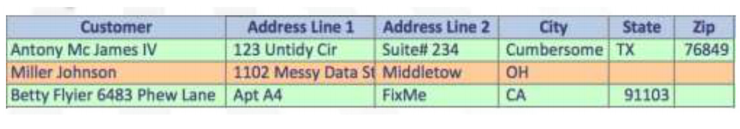



# Dealing with missing data
**Knowledge about domain** and data 
collection should drive your choice!
  * Create new classification (e.g. set values to zero)
  * Interpolate based on existing data
  * Omit missing data
  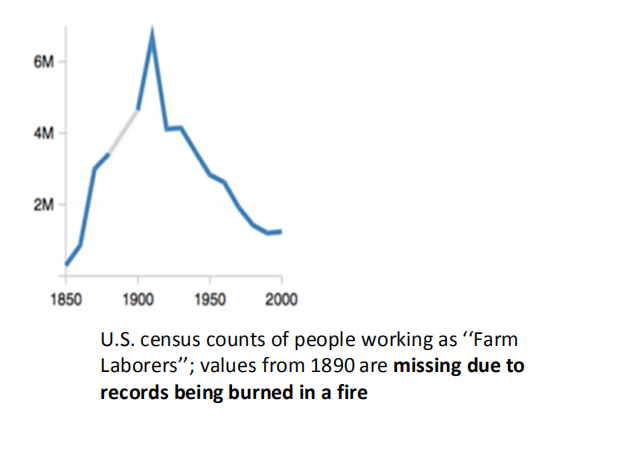
  * 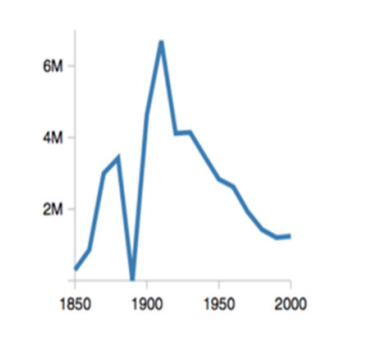
  * 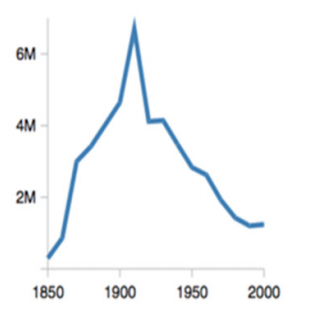
  * 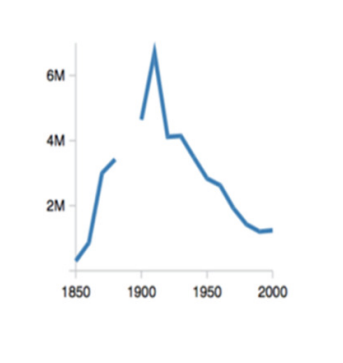

# Erroneous data
* What: recurring error data in a particular case
* Why:
  * Software bug
  * Interrupted process that generates data: e.g. user is disconnected during a Web survey session
* How to handle:
  * Dig into unreasonable data
  * Look at things aren’t being combined properly: e.g. sum, product

# Inconsistent data
* What: the same data can be represented in different ways
* Why:
  * Different platforms
  * Different input preferences
* Examples: 
  * Same address can be written in many different ways (street abbreviation, order between number and street, zip). 
  * Movies/Books might have different names in different countries
* How to handle:
  * List all variations and data representations
  * Normalize/combine them all together to get the correct results

# Malicious data
* What: data is intended to cause undesired effects
* Why: 
  * People trying to game/trick/cheat your system
  * Malicious attacks: e.g. spam
* How to deal:
  * Identify the attacks
  * Filter them out from the results
* E.g.:
  * The Case of **Crowdsourcing**
  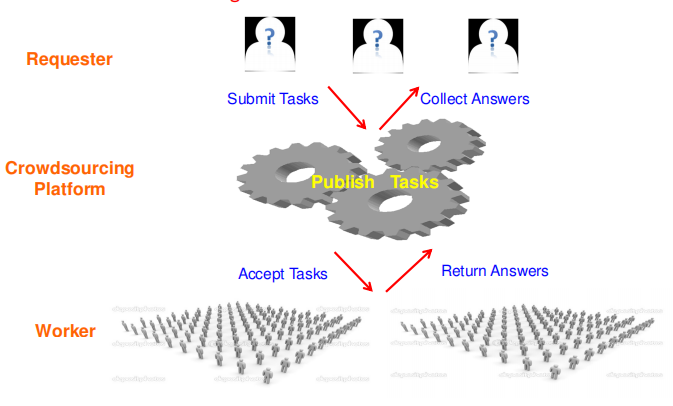

* **Truthful** workers
  * Expert
  * Normal
* **Untruthful** workers
  * Sloppy
  * Uniform spammer
  * Random spammer

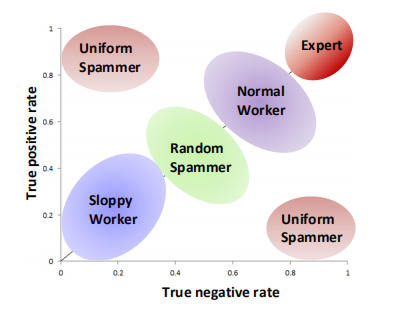

* Who is spammer?
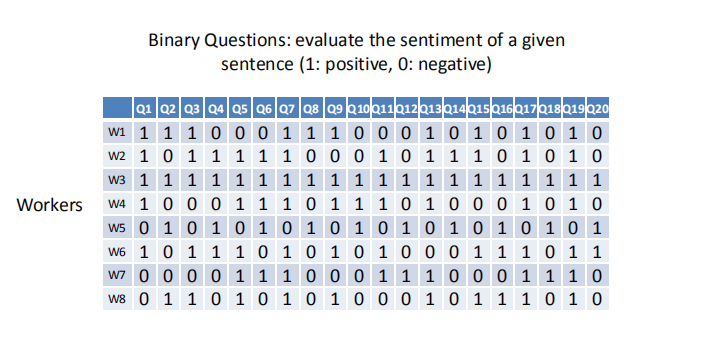

* Aggregated result
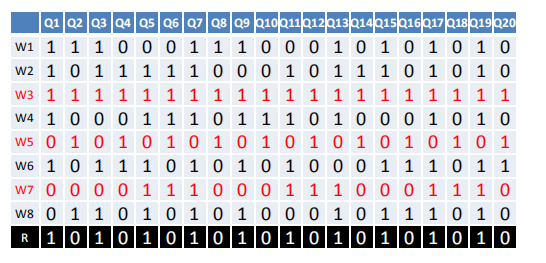

* How to detect malicious users: 
  * Expectation Maximization (EM)
* How it works:
  * Workers who provide **similar answers** should have **high reliability**
  * Answers which are provided by **reliable workers** should have **high quality**

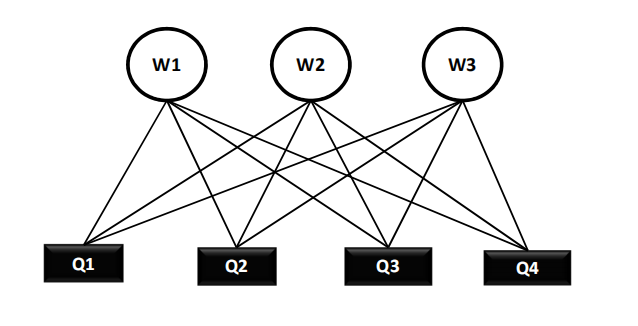

# Expectation Maximization: example
* **Step 1:**
  * Assume reliability of each worker is 1
  * Aggregated result: Q1 = 1, Q2 = 1, Q3 = 1, Q4 = 1
* **Step 2:**
  * Update worker reliability: `r1 = 1`, `r2 = 0.75`, `r3 = 0.25`
* Aggregated result: `Q1 = 1, Q2 = 1, Q3 = 1, Q4 = 1`
* **Stop** as the result is converged

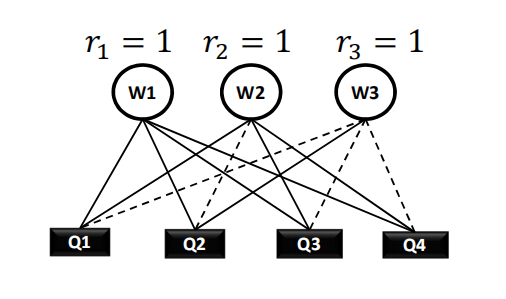

# EM: Math
* Iterates in two steps
  1. E-Step: estimate the labels from the answers of workers
  2. M-Step: estimate the reliability of workers from the consistency of answers

* **(E) step:** estimate answer for each question as image.png

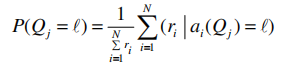

* **(M) step:** update the reliability as image.png

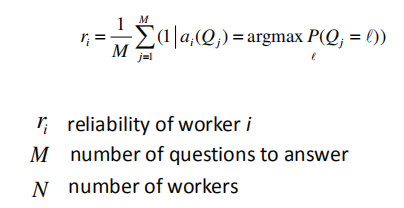

# Outliers
* Outlier: an observation point that is distant from other observations (a.k.a. noises, anomalies)
  * E.g. malicious data are often outliers
  * But non-malicious data can still be outlier
  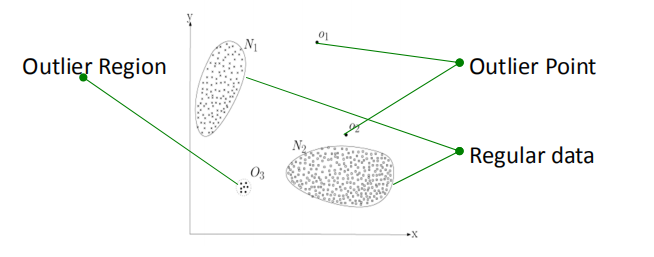

# Source of Outliers
* Human errors
  * Due to measurements (measure wrongly)
  * By accidents (spelling, typos, data entry errors, etc.)
  * Due to human bias (e.g., coding disease code in hospital), etc.
* Errors due to machines 
  * Software bugs
  * Data crawling errors
  * Data integration errors, etc.
* Others
  * Errors may be deliberate, duplicates, stale data (artifact of caching, not being refreshed)


# How to handle outliers
* Use standard deviation
  * e.g. Find data points more than some “multiple” of a standard deviation of  data
* Use statistical functions describing distribution: e.g. histogram
  * e.g. Points that lie in the tails are outliers
* Use scatter plots: 
  * e.g. Points that far away from others are outliers
* Using Interquartile range (IQR):
  * `X >= Q3 + 1.5 * IQR`
  * `X <= Q1 - 1.5 * IQR`
* Exclude them in the analysis
  * Sometimes it’s appropriate to remove outliers
    * But do this responsibly (understand why)
    * Do in it a principled manner (outlier detection)
* Sometimes we need to treat them as points of interest 
    * E.g. calculating the mean income of US citizens: don’t toss out billionaires.

# Data Cleaning: Summary
* Look at your data and examine it
* Question your results:
  * Look for weird things
  * Suspect “good” things even if you like your results
* Best practices:
  * Check frequencies of continuous and categorical variables for detection of unexpected values. 
For continuous variables, look into data “clumps” and “gaps”.
  * Check the type or numeric variables: decimal, integer, and date.
  * Check the meanings of misinformative values, e.g., “NA”, the blank, “”, the number ‘0’, the 
letter ‘O’, the dash, “-”, and the dot “.”
  * Check for out-of-range data: Values “far out” from the fences” of the data.  Check for outliers: Values “outside” the fences of the data.
  * Check for missing values, and the meanings of their coded values, e.g, the varied string of “9s”, 
the number “0”, the letter “O”, the dash “-”, and the dot “.”.
  * Check the logic of data, e.g., response rates cannot be 110%, and weigh contradictory values, 
along with conflict resolution rules, e.g., duplicate DOB: 12/22/56 and 12/22/65.
  * Last but not least, check for the typos.